In [76]:
#import libraries
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing

In [70]:
#loading data
df = pd.read_csv("monthly_milk.csv")
df.head(5)

,month,milk_prod_per_cow_kg
0,1962-01-01,265.05
1,1962-02-01,252.45
2,1962-03-01,288.00
3,1962-04-01,295.20
4,1962-05-01,327.15


In [71]:
df.month = pd.to_datetime(df.month)

In [72]:
#setting date as the index
df = df.set_index('month')

<AxesSubplot:xlabel='month'>

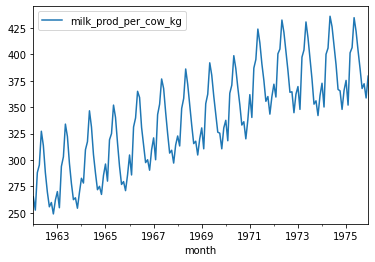

In [73]:
df.plot()

<AxesSubplot:xlabel='month'>

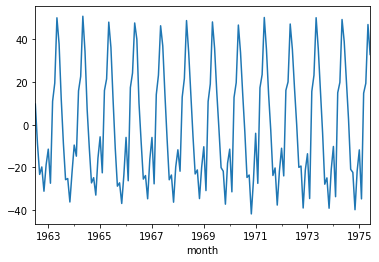

In [75]:
#removes seasonality and trend
result = seasonal_decompose(df.milk_prod_per_cow_kg, model='multiplicable')
data = df.milk_prod_per_cow_kg - result.seasonal - result.trend
data = data.dropna()
data.plot()

In [77]:
#creating SES model
ses = SimpleExpSmoothing(data)
alpha = 0.2
model = ses.fit(smoothing_level=alpha, optimized=False)

c:\Users\vidhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [85]:
#forecasting for next 3 months
forecast = model.forecast(3)
forecast

1975-07-01    11.674527
1975-08-01    11.674527
1975-09-01    11.674527
Freq: MS, dtype: float64

<AxesSubplot:xlabel='month'>

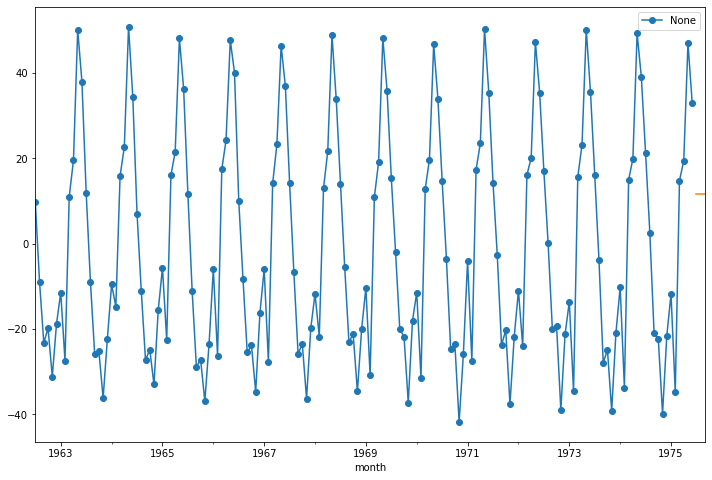

In [88]:
ax = data.plot(marker = 'o', figsize=(12,8), legend = True)
forecast.plot(ax = ax)